<a name="top"> <h1>01. ML Models</h1> <a>

<p>Análisis de sentimiento: Tweets<br />
<strong>Trabajo de Fin de Master</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>


<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>


<hr style="border:1px solid gray">

### Estructura

[Introducción](#introduccion) 

[1. Librerias utilizadas y funciones](#librerias) 

[2. Lectura del dataframe y preparación de los datos](#lectura) 

   - 2.1. Lectura del DF
   - 2.2. Preparación de los datos

[3. Evaluación de los modelos ](#modelos) 

   - 3.1. Support Vector Classifier
   - 3.2. Multinomial Naive Bayes
   - 3.3. Random Forest
   - 3.4. Logistic Regression


[4. Resultado de los modelos](#evaluacion) 


[5. Calibración del modelo](#calibracion)


<hr style="border:1px solid gray">

# <a name="introduccion"> Introducción <a>


En este segundo notebook procederemos a desarrollar diferentes modelos de Machine Learning en base al dataframe que preprocesamos en `0_DataPreprocessing`.

El objetivo será probar diferentes modelos de Machine Learning para poder clasificarlos según su rendimiento y observar si en función del texto, la puntuación asignada sería acorde a la del usuario.

Para el desarrollo de estas tareas utilizaremos la librería de SKLearn, la cual dispone de diferentes modelos de clasificación que funcionan bastante bien. En particular, probaremos varios modelos, como el SVC (Support Vector Classification), el Multinomial Naive Bayes, Random Forest y Regresión Logística.

# <a name="librerias"> 1. Librerias utilizadas y funciones <a>


Importamos las librerias a utilizar para la creación de modelos de ML:

In [11]:
# Import basic libraries.

import pandas as pd
import numpy as np
import string
import pickle
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns

# Import ML libraries.

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc

# Import libraries for evaluation.

from sklearn.model_selection import GridSearchCV

# <a name="lectura"> 2. Lectura del dataframe y preparación de los datos<a>


## 2.1. Lectura del DF

In [19]:
#Import parquet file.

reviews = pd.read_parquet('../../data/processed/reviews.parquet')

# Show the head of the dataframe.

reviews.head()

,reviewText,overall
0,amazon shopping amazoncom gift cards christmas...,1
1,got gift card friend best site much choose gre...,5
2,arent going save trees people complaining pape...,5
3,always get someone something amazon safety net...,5
4,take 50 dollars good money limitations turn am...,1


## 2.2. Preparación de los datos

Preparamos los datos para que puedan ser introducidos dentro de los modelos, separando en X el texto y en Y las puntuaciones.

In [13]:
# Divide the data into X and y.

X = reviews.reviewText
y = reviews.overall

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# <a name="modelos"> 3. Evaluación de los modelos<a>


## 3.1. Support Vector Classifier

In [9]:

tfidf = TfidfVectorizer(stop_words="english",max_df=0.99,min_df=0.01)
svc = SVC(probability=True)
model = make_pipeline(tfidf, svc)
#Training
model.fit(x_train, y_train)

#Prediccion sobre test
preds= model.predict(x_test)
predict_probabilities = model.predict_proba(x_test)


In [14]:
#Evaluation
print(classification_report(y_test,preds))
print(metrics.accuracy_score(y_test,preds))


              precision    recall  f1-score   support

           1       0.61      0.32      0.42      1420
           2       1.00      0.00      0.01       316
           3       0.00      0.00      0.00       597
           4       0.00      0.00      0.00      1739
           5       0.88      0.99      0.93     25367

    accuracy                           0.87     29439
   macro avg       0.50      0.26      0.27     29439
weighted avg       0.80      0.87      0.82     29439

0.8723122388668093


In [13]:
print(confusion_matrix(y_test,preds))

[[  455     0     1     0   964]
 [   61     1     0     0   254]
 [   51     0     0     0   546]
 [   40     0     0     0  1699]
 [  143     0     0     0 25224]]


In [15]:
# Save the model as a pickle file.

pickle.dump(model, open('../../models/svc_model.pkl', 'wb'))

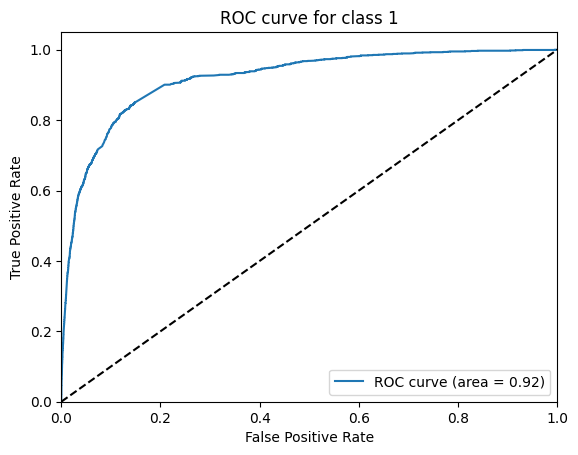

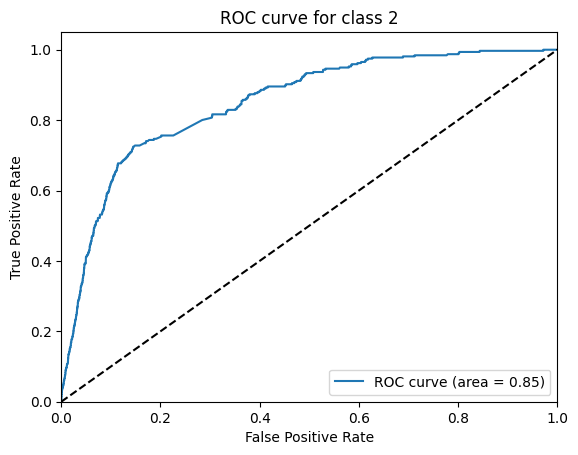

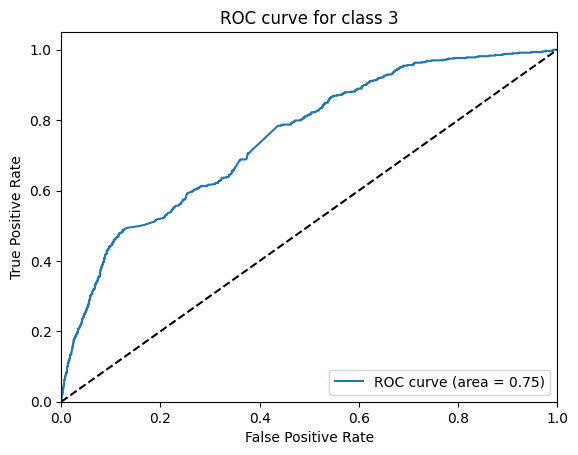

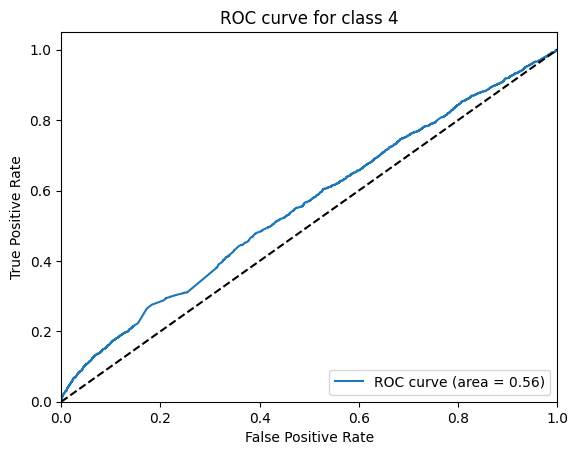

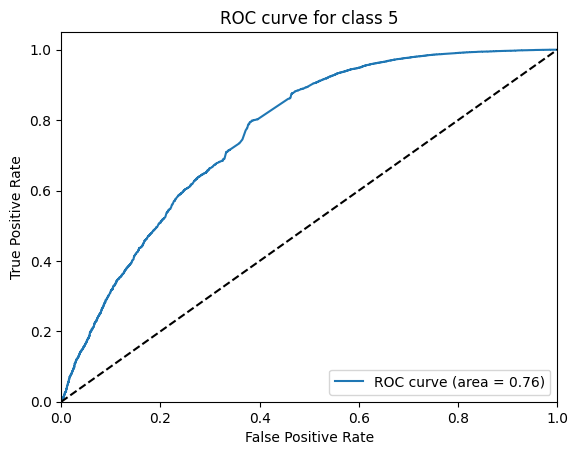

0.7674923259588285

In [23]:
# Create the ROC curve with one class vs rest.

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class

fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(5):
    
        fpr[i], tpr[i], _ = roc_curve(y_test, predict_probabilities[:, i], pos_label=i+1)
    
        roc_auc[i] = auc(fpr[i], tpr[i])
        
# Plot of a ROC curve for a specific class

for i in range(5):
    q = i+1
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC curve for class %i' % q)
    
    plt.legend(loc="lower right")
    
    plt.show()
    
# Calculate the AUC score.

roc_auc_score(y_test, predict_probabilities, multi_class='ovr')


## 3.2. Multinomial Naive Bayes

In [6]:
# Entrenar el modelo
clf = MultinomialNB()

# model = make_pipeline(tfidf, clf)
#Training
#model.fit(x_train, y_train)

#Prediccion sobre test
preds = model.predict(x_test )
predict_probabilities = model.predict_proba(x_test)

In [13]:
#Evaluation
print(classification_report(y_test,preds))
print(metrics.accuracy_score(y_test,preds))

# Classification report in a dataframe.

report = classification_report(y_test, preds, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df


              precision    recall  f1-score   support

           1       0.61      0.32      0.42      1420
           2       1.00      0.00      0.01       316
           3       0.00      0.00      0.00       597
           4       0.00      0.00      0.00      1739
           5       0.88      0.99      0.93     25367

    accuracy                           0.87     29439
   macro avg       0.50      0.26      0.27     29439
weighted avg       0.80      0.87      0.82     29439

0.8723122388668093


,precision,recall,f1-score,support
1,0.606667,0.320423,0.419355,1420.000000
2,1.000000,0.003165,0.006309,316.000000
3,0.000000,0.000000,0.000000,597.000000
4,0.000000,0.000000,0.000000,1739.000000
5,0.879283,0.994363,0.933289,25367.000000
accuracy,0.872312,0.872312,0.872312,0.872312
macro avg,0.497190,0.263590,0.271791,29439.000000
weighted avg,0.797658,0.872312,0.824492,29439.000000


[[  455     0     1     0   964]
 [   61     1     0     0   254]
 [   51     0     0     0   546]
 [   40     0     0     0  1699]
 [  143     0     0     0 25224]]


<Axes: >

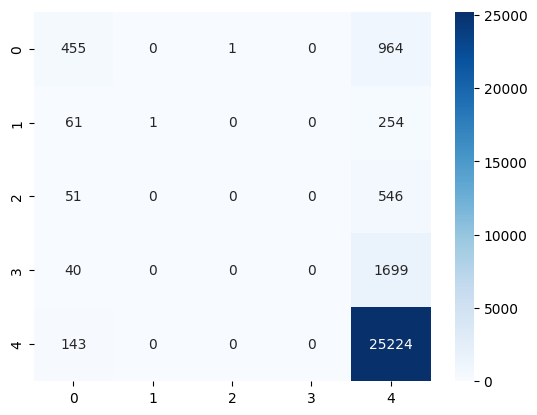

In [10]:
print(confusion_matrix(y_test,preds))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, preds)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')


In [27]:
# Save the model as a pickle file.

pickle.dump(model, open('../../models/multinomial_model.pkl', 'wb'))

In [3]:
# Load the model from the pickle file.

model = pickle.load(open('../../models/multinomial_model.pkl', 'rb'))

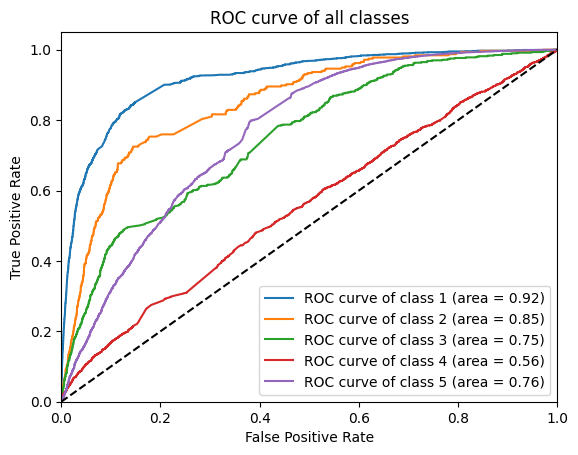

In [12]:
# Compute ROC curve and ROC area for each class

fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(5):
    
        fpr[i], tpr[i], _ = roc_curve(y_test, predict_probabilities[:, i], pos_label=i+1)
    
        roc_auc[i] = auc(fpr[i], tpr[i])
        
# Plot of the ROC curve of all classes in the same plot.

for i in range(5):
        
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i]))
        
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC curve of all classes')

plt.legend(loc="lower right")

plt.show()

## 3.3. Random Forest

In [17]:
# Entrenar el modelo

rf = RandomForestClassifier()

#model = make_pipeline(tfidf, rf)

#Training

#model.fit(x_train, y_train)

#Prediccion sobre test

preds= model.predict(x_test )
predict_probabilities = model.predict_proba(x_test)

[[  377     7    20     7  1009]
 [   56     5     2     2   251]
 [   46     0     9     6   536]
 [   27     2     4    30  1676]
 [  168     9    18    71 25101]]


<Axes: >

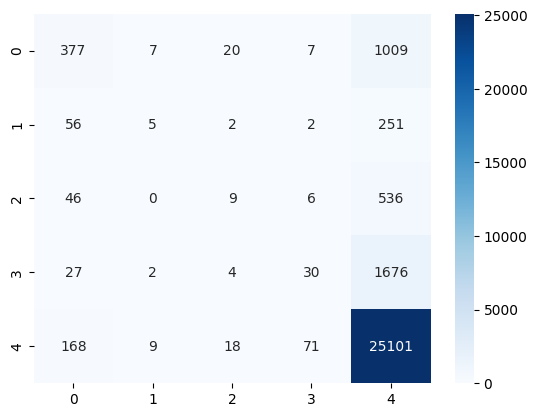

In [8]:
print(confusion_matrix(y_test,preds))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, preds)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')


In [18]:
#Evaluation
print(classification_report(y_test,preds))
print(metrics.accuracy_score(y_test,preds))

# Classification report in a dataframe.

report = classification_report(y_test, preds, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df


              precision    recall  f1-score   support

           1       0.56      0.27      0.36      1420
           2       0.22      0.02      0.03       316
           3       0.17      0.02      0.03       597
           4       0.26      0.02      0.03      1739
           5       0.88      0.99      0.93     25367

    accuracy                           0.87     29439
   macro avg       0.42      0.26      0.28     29439
weighted avg       0.81      0.87      0.82     29439

0.8669452087367098


,precision,recall,f1-score,support
1,0.559347,0.265493,0.360076,1420.000000
2,0.217391,0.015823,0.029499,316.000000
3,0.169811,0.015075,0.027692,597.000000
4,0.258621,0.017251,0.032345,1739.000000
5,0.878487,0.989514,0.930701,25367.000000
accuracy,0.866945,0.866945,0.866945,0.866945
macro avg,0.416731,0.260631,0.276063,29439.000000
weighted avg,0.805009,0.866945,0.822124,29439.000000


In [31]:
# Save the model as a pickle file.

pickle.dump(model, open('../../models/randomforest_model.pkl', 'wb'))

In [16]:
# Load the model from the pickle file.

model = pickle.load(open('../../models/randomforest_model.pkl', 'rb'))

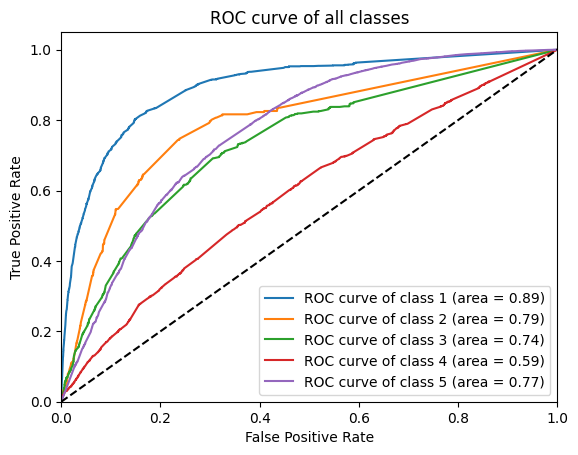

In [11]:
# Compute ROC curve and ROC area for each class

fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(5):
    
        fpr[i], tpr[i], _ = roc_curve(y_test, predict_probabilities[:, i], pos_label=i+1)
    
        roc_auc[i] = auc(fpr[i], tpr[i])
        
# Plot of the ROC curve of all classes in the same plot.

for i in range(5):
        
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i]))
        
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC curve of all classes')

plt.legend(loc="lower right")

plt.show()

## 3.4. Logistic Regression

In [13]:
# Entrenar el modelo
tfidf = TfidfVectorizer(stop_words="english",max_df=0.99,min_df=0.01)
lr = LogisticRegression()

#model = make_pipeline(tfidf, lr)

#Training

#model.fit(x_train, y_train)

#Prediccion sobre test

preds= model.predict(x_test )

[[  451     0     0     0   969]
 [   52     0     0     0   264]
 [   56     0     1     0   540]
 [   42     0     1     0  1696]
 [  167     1     0     0 25199]]


<Axes: >

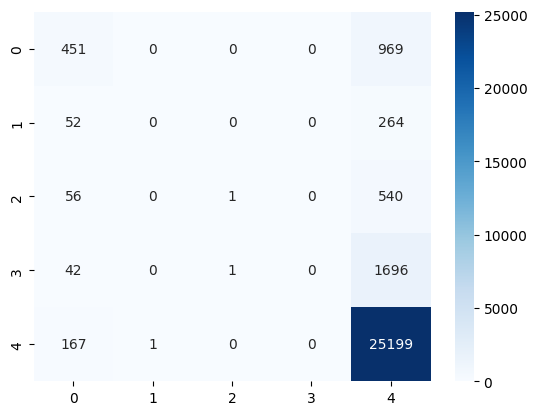

In [14]:
print(confusion_matrix(y_test,preds))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, preds)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')


In [20]:
#Evaluation
print(classification_report(y_test,preds))
print(metrics.accuracy_score(y_test,preds))

# Classification report in a dataframe.

report = classification_report(y_test, preds, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df


              precision    recall  f1-score   support

           1       0.56      0.27      0.36      1420
           2       0.22      0.02      0.03       316
           3       0.17      0.02      0.03       597
           4       0.26      0.02      0.03      1739
           5       0.88      0.99      0.93     25367

    accuracy                           0.87     29439
   macro avg       0.42      0.26      0.28     29439
weighted avg       0.81      0.87      0.82     29439

0.8669452087367098


,precision,recall,f1-score,support
1,0.559347,0.265493,0.360076,1420.000000
2,0.217391,0.015823,0.029499,316.000000
3,0.169811,0.015075,0.027692,597.000000
4,0.258621,0.017251,0.032345,1739.000000
5,0.878487,0.989514,0.930701,25367.000000
accuracy,0.866945,0.866945,0.866945,0.866945
macro avg,0.416731,0.260631,0.276063,29439.000000
weighted avg,0.805009,0.866945,0.822124,29439.000000


In [38]:
# Save the model as a pickle file.  

pickle.dump(model, open('../../models/logistic_model.pkl', 'wb'))

In [19]:
# Load the model from the pickle file.

model = pickle.load(open('../../models/logistic_model.pkl', 'rb'))

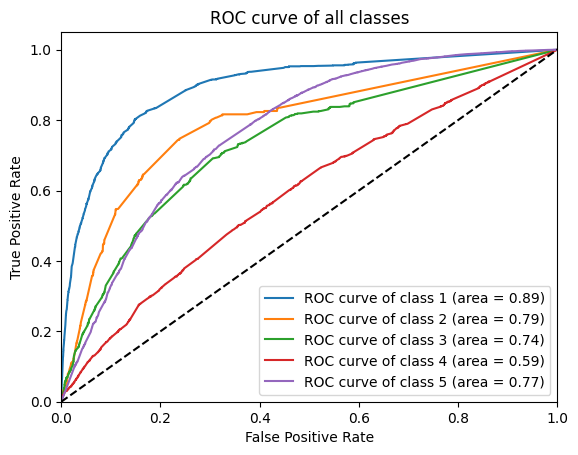

In [15]:
# Compute ROC curve and ROC area for each class

fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(5):
    
        fpr[i], tpr[i], _ = roc_curve(y_test, predict_probabilities[:, i], pos_label=i+1)
    
        roc_auc[i] = auc(fpr[i], tpr[i])
        
# Plot of the ROC curve of all classes in the same plot.

for i in range(5):
        
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i]))
        
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC curve of all classes')

plt.legend(loc="lower right")

plt.show()

# <a name="evaluacion"> 4. Resultado de los modelos <a>


Observamos los restultados arrojados por los modelos:

In [ ]:
# Create a dataframe with the results of each model.

results = pd.DataFrame({'Model': ['SVC', 'MultinomialNB', 'RandomForestClassifier', 'LogisticRegression'], 'Accuracy': [0.872, 0.863, 0.866, 0.871]})

# Show the results.

results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy
0,SVC,0.872
1,LogisticRegression,0.871
2,RandomForestClassifier,0.866
3,MultinomialNB,0.863


# <a name="calibracion"> 5. Calibración del modelo <a>


In [ ]:
# Tune the hyperparameters of the SVC model.

parameters = {'svc__C': [0.1, 1, 10], 'svc__gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, parameters, cv=5)
grid.fit(x_train, y_train)

# Show the best parameters.

grid.best_params_

# Show the best score.

grid.best_score_


In [36]:
# Texto nuevo a predecir

new_text = "Shit product, don't like"

# Vectorizar el texto nuevo utilizando el vectorizador ajustado
new_text_vector = tfidf.transform([new_text])

# Realizar la predicción
predicted_sentiment = model.predict(new_text_vector)
print("Sentimiento predicho:", predicted_sentiment)

Sentimiento predicho: [5]


In [22]:
reviews.reviewText[0]

'amazon shopping amazoncom gift cards christmas gifts really disappointed five choices isnt one says merry christmas mentions christmas sure alone wanting card reflects actual holiday celebrating principle send amazon gift card christmas whats political correctness bad marketing decision lynn'